# Proyek Analisis Data: [Fahmy Anugrah Dataset]
* Nama: [Fahmy Anugrah]
* Email: [fahmirty@gmail.com]
* ID Dicoding: [Fahmy anugrah]

## Menentukan Pertanyaan Bisnis

1.   Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu atau bulan dalam setahun? Apakah ada hari atau bulan dengan penyewaan tertinggi/terendah?
2.   Bagaimana pengaruh cuaca (temp, atemp, hum, windspeed) terhadap jumlah penyewaan sepeda?
3. Apakah ada tren musiman dalam penyewaan sepeda?
4. Bagaimana distribusi penyewaan sepeda berdasarkan tipe pengguna (casual, registered)?
5. apakah ada jam tertentu dalam penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wragling

**Gathering Data**

In [46]:

day_df = pd.read_csv("https://raw.githubusercontent.com/skr-g16/proyek_analisis_data/main/data/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/skr-g16/proyek_analisis_data/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Assesing Data**

Menilai tabel **day_df()**



In [48]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [50]:
print("Jumlah Duplikasi : ",day_df.duplicated().sum())

Jumlah Duplikasi :  0


In [51]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Tabel **hour_df()**

In [52]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [53]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [54]:
print("jumlah Duplikasi : ",hour_df.duplicated().sum())


jumlah Duplikasi :  0


In [55]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [56]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Cleaning Data


- membersihkan tabel day_df()
- memperbaiki tipe data

In [57]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [58]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [59]:
day_df['temp'] = (day_df['temp']*100).round().astype(int)
day_df['atemp'] = (day_df['atemp']*100).round().astype(int)
day_df['hum'] = (day_df['hum']*100).round().astype(int)
day_df['windspeed'] = (day_df['windspeed']*100).round().astype(int)
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,34,36,81,16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,36,35,70,25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,20,19,44,25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,20,21,59,16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,23,23,44,19,82,1518,1600


In [60]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    int64         
 10  atemp       731 non-null    int64         
 11  hum         731 non-null    int64         
 12  windspeed   731 non-null    int64         
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), int6

- membersihkan tabel hour_df()
- memperbaiki tipe data

In [61]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [62]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [63]:
hour_df['temp'] = (hour_df['temp']*100).round().astype(int)
hour_df['atemp'] = (hour_df['atemp']*100).round().astype(int)
hour_df['hum'] = (hour_df['hum']*100).round().astype(int)
hour_df['windspeed'] = (hour_df['windspeed']*100).round().astype(int)
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,24,29,81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,22,27,80,0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,22,27,80,0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,24,29,75,0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,24,29,75,0,0,1,1


In [64]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  int64         
 11  atemp       17379 non-null  int64         
 12  hum         17379 non-null  int64         
 13  windspeed   17379 non-null  int64         
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##Exploratory Data Analysis (EDA)


In [65]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,49.698717,47.583578,62.722884,18.787099,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,34.000000,33.000000,48.000000,10.000000,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,50.000000,48.000000,63.000000,19.000000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,66.000000,62.000000,78.000000,25.000000,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,100.000000,100.000000,100.000000,85.000000,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,19.255612,17.225795,19.292983,12.272026,49.305030,151.357286,181.387599


In [66]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,24,29,81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,22,27,80,0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,22,27,80,0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,24,29,75,0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,24,29,75,0,0,1,1


In [67]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,49.541724,47.432285,62.792066,19.038304,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,8.000000,0.000000,2.000000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,34.000000,34.000000,52.000000,13.000000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,50.000000,49.000000,63.000000,18.000000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,66.000000,61.000000,73.000000,23.000000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,86.000000,84.000000,97.000000,51.000000,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,18.320790,16.292758,14.263585,7.767947,686.622488,1560.256377,1937.211452


In [68]:
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,34,36,81,16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,36,35,70,25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,20,19,44,25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,20,21,59,16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,23,23,44,19,82,1518,1600


### Pola penyewaan sepeda dalam mingguan dan Bulanan

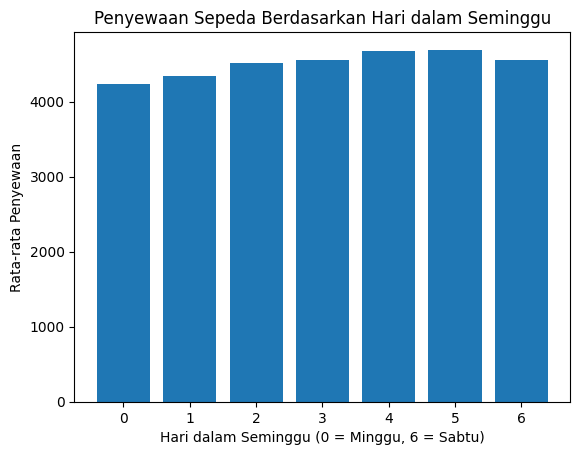

In [69]:
weekday_avg = day_df.groupby('weekday')['cnt'].mean()
plt.bar(weekday_avg.index, weekday_avg.values)
plt.xlabel('Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.show()

In [70]:
month_avg = day_df.groupby('mnth')['cnt'].mean()
print(month_avg)

mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64


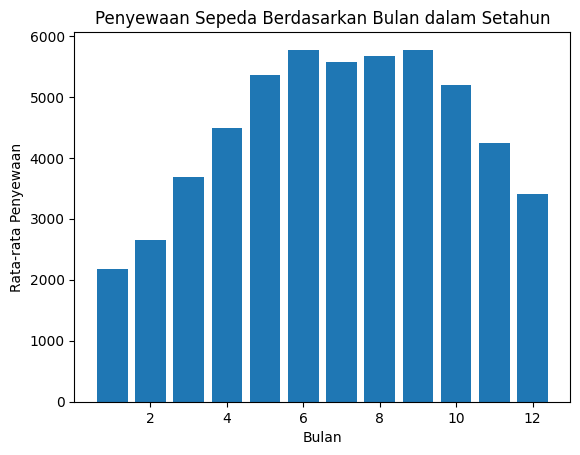

In [71]:
plt.bar(month_avg.index, month_avg.values)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Penyewaan Sepeda Berdasarkan Bulan dalam Setahun')
plt.show()

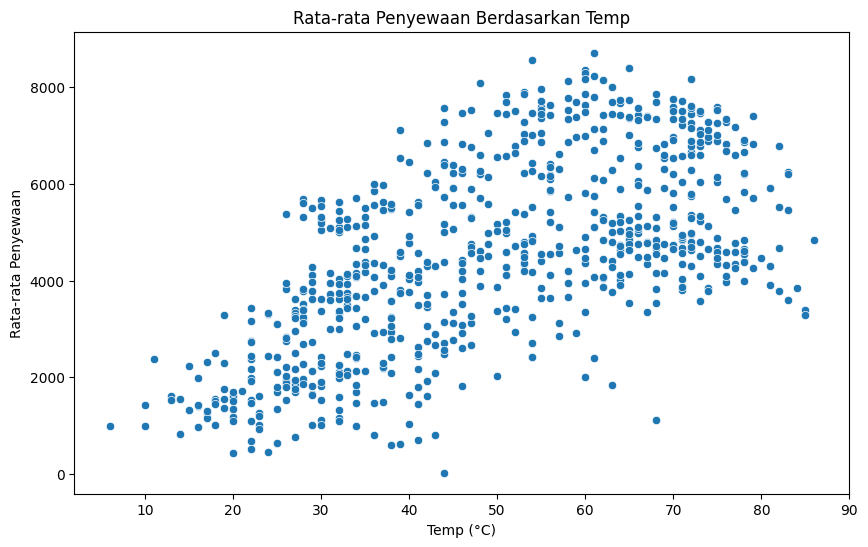

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Rata-rata Penyewaan Berdasarkan Temp')
plt.xlabel('Temp (°C)')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

### Pengaruh Cuaca terhadap penyewaan sepeda

In [73]:
korelasi_temp = day_df['temp'].corr(day_df['cnt'])
print('Korelasi Antar temperatur dengan jumlah penyewaan : ',korelasi_temp)

Korelasi Antar temperatur dengan jumlah penyewaan :  0.6272162855736555


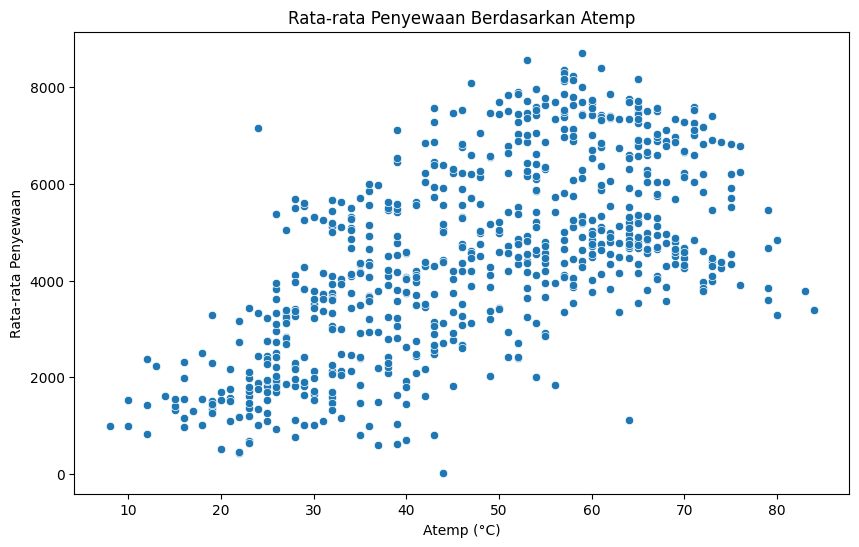

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='cnt', data=day_df)
plt.title('Rata-rata Penyewaan Berdasarkan Atemp')
plt.xlabel('Atemp (°C)')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

In [75]:
korelasi_atemp = day_df['atemp'].corr(day_df['cnt'])
print('Korelasi Antar atemp dengan jumlah penyewaan : ',korelasi_atemp)

Korelasi Antar atemp dengan jumlah penyewaan :  0.6304911253815462


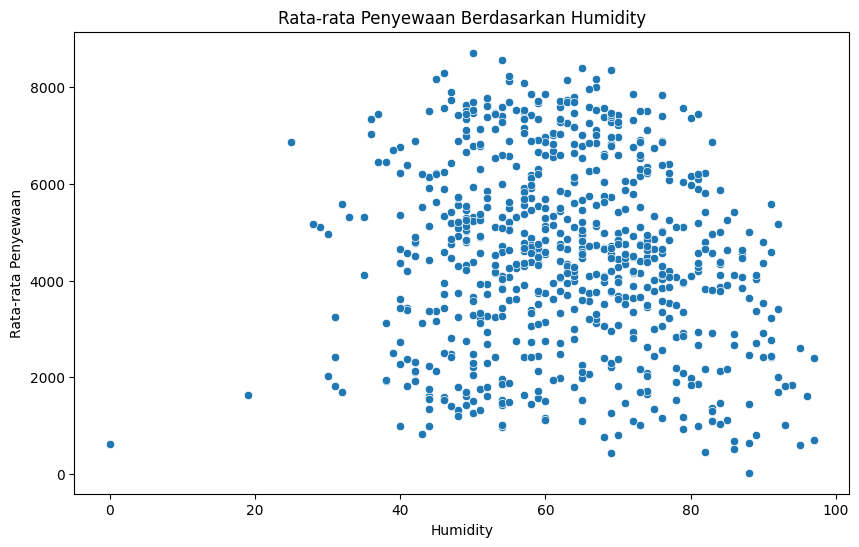

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Rata-rata Penyewaan Berdasarkan Humidity')
plt.xlabel('Humidity')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

In [77]:
korelasi_hum = day_df['hum'].corr(day_df['cnt'])
print('Korelasi Antar humidity dengan jumlah penyewaan : ',korelasi_hum)

Korelasi Antar humidity dengan jumlah penyewaan :  -0.10155805611929855


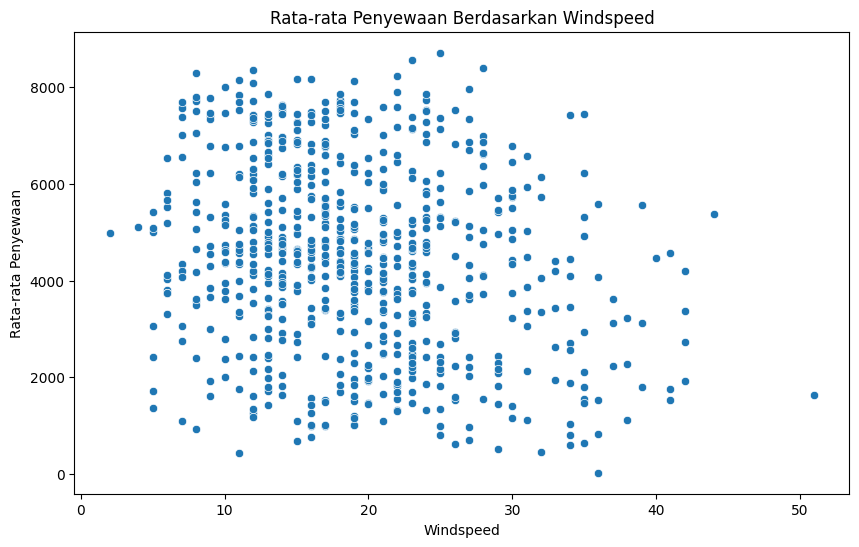

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_df)
plt.title('Rata-rata Penyewaan Berdasarkan Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

In [79]:
korelasi_windspeed = day_df['windspeed'].corr(day_df['cnt'])
print('Korelasi Antar windspeed dengan jumlah penyewaan : ',korelasi_windspeed)

Korelasi Antar windspeed dengan jumlah penyewaan :  -0.23420781367066637


### Melihat tren musim dalam penyewaan sepeda

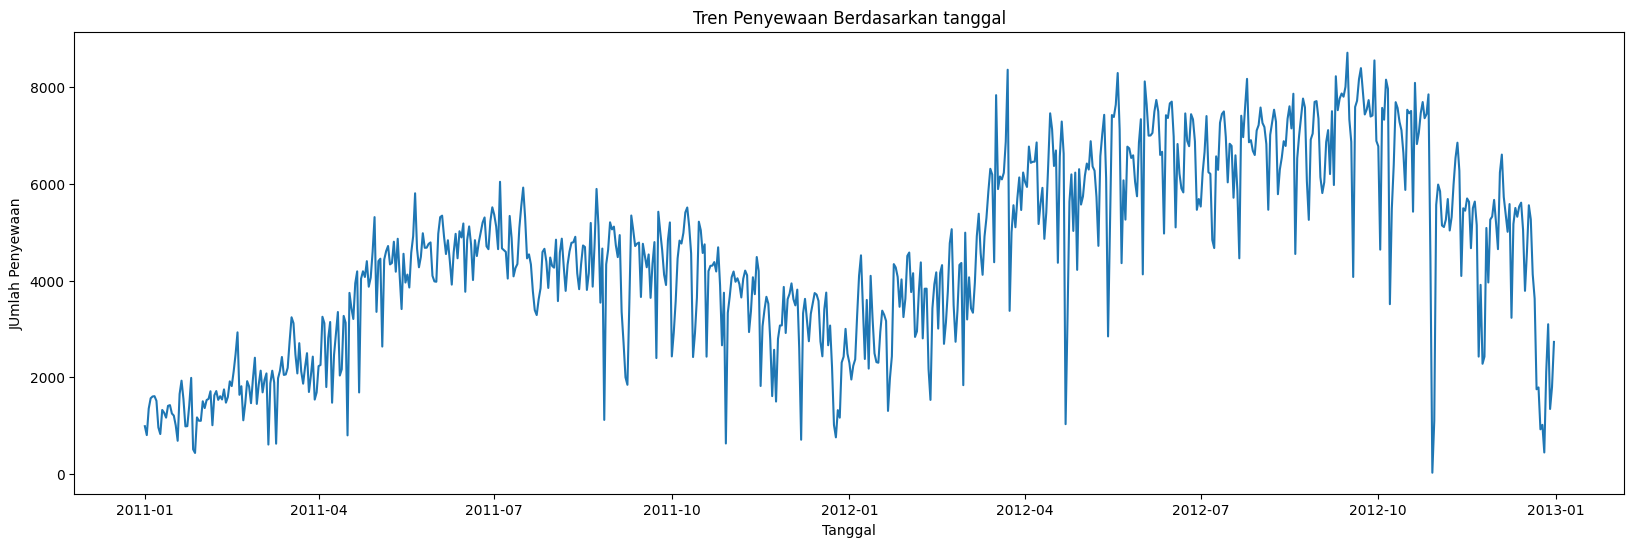

In [80]:
plt.figure(figsize=(20, 6))
plt.plot(day_df['dteday'],day_df['cnt'])
plt.title('Tren Penyewaan Berdasarkan tanggal')
plt.xlabel('Tanggal')
plt.ylabel('JUmlah Penyewaan')
plt.show()

### Melihat penyewa berdasarkaan tipe pengguna

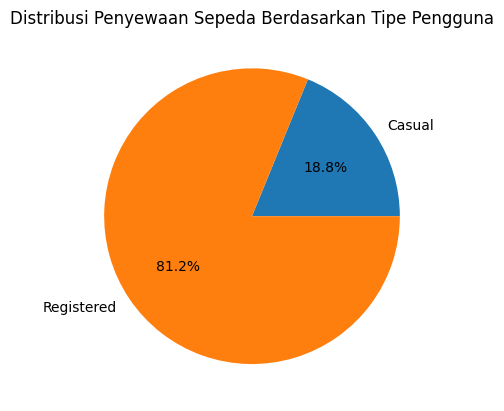

In [81]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

plt.pie([total_casual, total_registered], labels=['Casual', 'Registered'], autopct='%1.1f%%')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Tipe Pengguna')
plt.show()

### Melihat Jam dengan total penyewaan

In [82]:
rata_rata_penyewaan_jam = hour_df.groupby('hr')['cnt'].mean()
print(rata_rata_penyewaan_jam)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


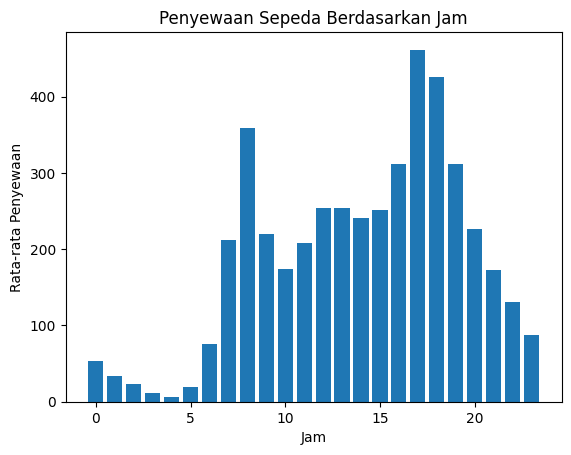

In [83]:
plt.bar(rata_rata_penyewaan_jam.index, rata_rata_penyewaan_jam.values)
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.show()

Membuat Hour_df dari jam menjadi harian

In [86]:
hourly_agg = hour_df.groupby('dteday').agg({
    'season': 'first',
    'yr': 'first',
    'mnth': 'first',
    'holiday': 'first',
    'weekday': 'first',
    'workingday': 'first',
    'weathersit': 'mean',
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

hourly_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    float64       
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(9)
memory usage: 85.8 KB


Menggabungkan day_df dan hour_df

In [88]:
all_df = pd.merge(day_df, hourly_agg, on='dteday', suffixes=('_day', '_hour'))

In [91]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   dteday           731 non-null    datetime64[ns]
 2   season_day       731 non-null    int64         
 3   yr_day           731 non-null    int64         
 4   mnth_day         731 non-null    int64         
 5   holiday_day      731 non-null    int64         
 6   weekday_day      731 non-null    int64         
 7   workingday_day   731 non-null    int64         
 8   weathersit_day   731 non-null    int64         
 9   temp_day         731 non-null    int64         
 10  atemp_day        731 non-null    int64         
 11  hum_day          731 non-null    int64         
 12  windspeed_day    731 non-null    int64         
 13  casual_day       731 non-null    int64         
 14  registered_day   731 non-null    int64    

In [92]:
all_df.to_csv("all_data.csv", index=False)

In [ ]:
hour_df.to_csv("clean_hour_df",index=False)